In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520715 entries, 0 to 520714
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    520715 non-null  int64  
 1    Destination Port             520715 non-null  int64  
 2    Flow Duration                520715 non-null  int64  
 3    Total Fwd Packets            520715 non-null  int64  
 4    Total Backward Packets       520715 non-null  int64  
 5   Total Length of Fwd Packets   520715 non-null  int64  
 6    Total Length of Bwd Packets  520715 non-null  int64  
 7    Fwd Packet Length Max        520715 non-null  int64  
 8    Fwd Packet Length Min        520715 non-null  int64  
 9    Fwd Packet Length Mean       520715 non-null  float64
 10   Fwd Packet Length Std        520715 non-null  float64
 11  Bwd Packet Length Max         520715 non-null  int64  
 12   Bwd Packet Length Min        520715 non-nul

In [5]:
data.duplicated().sum()

0

Removing Redundant Features

In [6]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
data.dropna(inplace=True)
data.isin([np.inf, -np.inf]).sum()
data.drop_duplicates(keep=False, inplace=True)

In [7]:

x_f = data.iloc[:,:-1]
y_f = data.iloc[:,-1]

In [8]:
y_f.value_counts()

Normal          434746
Dos/DdoS         64586
PortScan         18349
Brute Force       1864
Web Attack         429
Bot                388
Infiltration         7
Name:  Label, dtype: int64

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_f = scaler.fit_transform(x_f )
x_f = pd.DataFrame(x_f)

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_f=encoder.fit_transform(y_f)

In [ ]:
NL = pd.DataFrame(x_f)
L = pd.DataFrame(y_f)

In [ ]:
data = pd.concat([NL, L], axis=1)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.iloc[:,-1].value_counts()

4    434746
2     64586
5     18349
1      1864
6       429
0       388
3         7
Name: 0, dtype: int64

In [ ]:
for i in range(0,78):
  globals()[f"d{i}"] = x_f.iloc[:,i].astype("float32")

In [ ]:
d78 = data.iloc[:,-1].astype("int8")

In [ ]:
d78.dtype

dtype('int8')

In [ ]:
d78.value_counts()

4    434746
2     64586
5     18349
1      1864
6       429
0       388
3         7
Name: 0, dtype: int64

In [ ]:
df1 = pd.concat([d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65,d66,d67,d68,d69,d70,d71,d72,d73,d74,d75,d76,d77,d78], axis=1)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,0
0,0.000009,0.001343,6.949999e-06,0.000027,0.000014,0.000251,5.431358e-07,0.008864,0.0,0.011767,...,0.000023,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4
1,0.000026,0.001343,9.366666e-06,0.000036,0.000024,0.001715,4.659373e-06,0.062530,0.0,0.062627,...,0.000033,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4
2,0.000032,0.757942,2.196755e-01,0.000091,0.000048,0.002036,4.076570e-06,0.037712,0.0,0.031859,...,0.000089,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4
3,0.000046,0.005936,1.083333e-07,0.000005,0.000000,0.000004,0.000000e+00,0.000282,0.0,0.000629,...,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4
4,0.000068,0.001343,9.449999e-06,0.000041,0.000021,0.001724,4.808888e-06,0.063457,0.0,0.056652,...,0.000014,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520364,0.999502,0.001221,9.585577e-02,0.000032,0.000021,0.000271,1.774650e-05,0.019944,0.0,0.011128,...,0.000005,1.0,0.000007,0.0,0.000007,0.000007,0.054171,0.0,0.054171,2
520365,0.999514,0.001221,9.584147e-02,0.000027,0.000017,0.000162,1.774650e-05,0.011926,0.0,0.007605,...,0.000005,1.0,0.000008,0.0,0.000008,0.000008,0.054157,0.0,0.054157,2
520366,0.999567,0.001221,9.584826e-02,0.000027,0.000017,0.000205,1.774650e-05,0.015109,0.0,0.009635,...,0.000005,1.0,0.000008,0.0,0.000008,0.000008,0.054164,0.0,0.054164,2
520367,0.999850,0.001221,9.595409e-02,0.000032,0.000021,0.000239,1.774650e-05,0.017566,0.0,0.009802,...,0.000005,1.0,0.000009,0.0,0.000009,0.000009,0.054244,0.0,0.054244,2


In [ ]:

d_1 = df1.iloc[:,0]
d_4 = df1.iloc[:,1]
d_6 = df1.iloc[:,3]
d_70 = df1.iloc[:,14]
d_72 = df1.iloc[:,15]
d_73 = df1.iloc[:,18]
d_48 = df1.iloc[:,21]
d_69 = df1.iloc[:,28]
d_8 = df1.iloc[:,37]
d_30 = df1.iloc[:,47]
d_76 = df1.iloc[:,53]
d_12 = df1.iloc[:,5]
d_25 = df1.iloc[:,67]
d_65 = df1.iloc[:,68]


In [ ]:
data = pd.DataFrame([d_1,d_4,d_6,d_70,d_72,d_73,d_48,d_69,d_8,d_30,d_76,d_12,d_25,d_65,d78])

In [ ]:
data = data.T

In [ ]:
data.shape

(520369, 15)

In [ ]:
data.head()

,0,1,3,14,15,18,21,28,37,47,53,5,67,68,0
0,0.000009,0.001343,0.000027,0.015303,0.112346,0.000002,6.850000e-06,0.000005,2.838605e-03,1.0,0.020798,0.000251,0.125015,0.031342,4.0
1,0.000026,0.001343,0.000036,0.110034,0.114307,0.000002,9.266667e-06,0.000004,2.697842e-03,1.0,0.108699,0.001715,0.125015,0.031342,4.0
2,0.000032,0.757942,0.000091,0.048388,0.111921,0.050685,2.196754e-01,0.003581,2.655433e-07,1.0,0.051329,0.002036,0.125015,0.031342,4.0
3,0.000046,0.005936,0.000005,0.000000,0.114923,0.000000,8.333333e-09,0.000000,6.666667e-01,0.0,0.001967,0.000004,0.003632,0.000000,4.0
4,0.000068,0.001343,0.000041,0.121184,0.114330,0.000003,9.350000e-06,0.000004,2.970885e-03,1.0,0.110701,0.001724,0.445572,0.031769,4.0


In [ ]:
data

,0,1,3,14,15,18,21,28,37,47,53,5,67,68,0
0,0.000009,0.001343,0.000027,0.015303,0.112346,0.000002,6.850000e-06,0.000005,2.838605e-03,1.0,0.020798,0.000251,0.125015,0.031342,4.0
1,0.000026,0.001343,0.000036,0.110034,0.114307,0.000002,9.266667e-06,0.000004,2.697842e-03,1.0,0.108699,0.001715,0.125015,0.031342,4.0
2,0.000032,0.757942,0.000091,0.048388,0.111921,0.050685,2.196754e-01,0.003581,2.655433e-07,1.0,0.051329,0.002036,0.125015,0.031342,4.0
3,0.000046,0.005936,0.000005,0.000000,0.114923,0.000000,8.333333e-09,0.000000,6.666667e-01,0.0,0.001967,0.000004,0.003632,0.000000,4.0
4,0.000068,0.001343,0.000041,0.121184,0.114330,0.000003,9.350000e-06,0.000004,2.970885e-03,1.0,0.110701,0.001724,0.445572,0.031769,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520364,0.999502,0.001221,0.000032,0.378948,0.111922,0.025716,5.419938e-02,0.038669,2.318300e-07,1.0,0.243455,0.000271,0.445572,0.003601,2.0
520365,0.999514,0.001221,0.000027,0.660695,0.111922,0.027701,5.419932e-02,0.040863,2.028815e-07,1.0,0.279370,0.000162,0.445572,0.003601,2.0
520366,0.999567,0.001221,0.000027,0.660695,0.111922,0.027706,5.419777e-02,0.040867,2.028672e-07,1.0,0.281221,0.000205,0.445572,0.003601,2.0
520367,0.999850,0.001221,0.000032,0.378948,0.111922,0.025743,5.427560e-02,0.038711,2.315925e-07,1.0,0.242271,0.000239,0.445572,0.003601,2.0


In [ ]:
import numpy as np
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
data.dropna(inplace=True)
data.isin([np.inf, -np.inf]).sum()


0     0
1     0
3     0
14    0
15    0
18    0
21    0
28    0
37    0
47    0
53    0
5     0
67    0
68    0
0     0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(520369, 15)

In [ ]:

data.isnull().sum()

0     0
1     0
3     0
14    0
15    0
18    0
21    0
28    0
37    0
47    0
53    0
5     0
67    0
68    0
0     0
dtype: int64

In [ ]:
"""from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy="auto",k_neighbors = 6, random_state=1)
sm.fit(da_t.iloc[:,:-1],da_t.iloc[:,-1])
x_f,y_f = sm.fit_resample(da_t.iloc[:,:-1].values,da_t.iloc[:,-1].ravel())"""

'from imblearn.over_sampling import SMOTE\nsm = SMOTE(sampling_strategy="auto",k_neighbors = 6, random_state=1)\nsm.fit(da_t.iloc[:,:-1],da_t.iloc[:,-1])\nx_f,y_f = sm.fit_resample(da_t.iloc[:,:-1].values,da_t.iloc[:,-1].ravel())'

In [ ]:
x_f = data.iloc[:,:-1]
y_f = data.iloc[:,-1]

In [ ]:

"""from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_f=encoder.fit_transform(y_f)"""

'from sklearn.preprocessing import LabelEncoder\nencoder = LabelEncoder()\ny_f=encoder.fit_transform(y_f)'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_f,x_test_f, y_train_f, y_test_f= train_test_split(x_f,y_f, test_size=0.3, random_state=12)

navie'e bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train_f, y_train_f)

BernoulliNB()

In [ ]:
from sklearn.metrics import r2_score,classification_report

In [ ]:




from sklearn.naive_bayes import GaussianNB
y_pred = BNB_Classifier.predict(x_train_f)

r2_score_train = r2_score(y_pred, y_train_f)
r2_score_train

0.01108377108131775

In [ ]:
y_f

0         4.0
1         4.0
2         4.0
3         4.0
4         4.0
         ... 
520364    2.0
520365    2.0
520366    2.0
520367    2.0
520368    2.0
Name: 0, Length: 520369, dtype: float32

In [ ]:
n=pd.DataFrame(y_f)
n.value_counts()

4.0    434746
2.0     64586
5.0     18349
1.0      1864
6.0       429
0.0       388
3.0         7
dtype: int64

In [ ]:
y_pred

array([2., 4., 4., ..., 2., 2., 4.], dtype=float32)

In [ ]:
y_pred = BNB_Classifier.predict(x_test_f)
r2_score_test = r2_score(y_pred, y_test_f)
r2_score_test

0.009900817207139867

In [ ]:
print(classification_report(y_test_f, y_pred, digits=5, zero_division=1))

              precision    recall  f1-score   support

         0.0    1.00000   0.00000   0.00000       110
         1.0    0.00000   0.00000   0.00000       550
         2.0    0.32143   0.77177   0.45384     19112
         3.0    1.00000   0.00000   0.00000         3
         4.0    0.95528   0.75503   0.84343    130741
         5.0    0.97616   0.98277   0.97945      5457
         6.0    0.08686   0.87681   0.15807       138

    accuracy                        0.76194    156111
   macro avg    0.61996   0.48377   0.34783    156111
weighted avg    0.87431   0.76194   0.79630    156111



In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, y_pred)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.23806


knn

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
weights = np.random.rand(2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train_f, y_train_f)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
KNN_pred_test = KNN_Classifier.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, KNN_pred_test, digits=5))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0    0.89000   0.80909   0.84762       110
         1.0    0.95893   0.97636   0.96757       550
         2.0    0.98981   0.99063   0.99022     19112
         3.0    0.00000   0.00000   0.00000         3
         4.0    0.99612   0.99623   0.99618    130741
         5.0    0.95975   0.95254   0.95613      5457
         6.0    0.64474   0.71014   0.67586       138

    accuracy                        0.99354    156111
   macro avg    0.77705   0.77643   0.77622    156111
weighted avg    0.99354   0.99354   0.99354    156111



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, KNN_pred_test)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00646


stacking with meta model as BernoulliNB

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



In [ ]:
'''seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed)

base_cls = DecisionTreeClassifier()




num_trees = 500

model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)'''


'seed = 8\nkfold = model_selection.KFold(n_splits = 3,\n                       random_state = seed)\n \nbase_cls = DecisionTreeClassifier()\n\n\n\n\nnum_trees = 500\n \nmodel = BaggingClassifier(base_estimator = base_cls,\n                          n_estimators = num_trees,\n                          random_state = seed)'

In [ ]:



'''BNB_Classifier = BernoulliNB()

from sklearn.svm import LinearSVC
svc = LinearSVC()

from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)'''

'BNB_Classifier = BernoulliNB()\n\nfrom sklearn.svm import LinearSVC          \nsvc = LinearSVC()\n\nfrom sklearn.neighbors import KNeighborsClassifier\nKNN_Classifier = KNeighborsClassifier(n_jobs=-1)'

In [ ]:
'''base_estimators = list()

base_estimators.append(("m1",BNB_Classifier))
base_estimators.append(("m2",svc))
base_estimators.append(("m3",KNN_Classifier))'''

'base_estimators = list()\n\nbase_estimators.append(("m1",BNB_Classifier))\nbase_estimators.append(("m2",svc))\nbase_estimators.append(("m3",KNN_Classifier))'

In [ ]:
'''aggregator1 =GaussianNB()
model1 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator1, cv=5)
score = model1.fit(x_train_f, y_train_f).score(x_test_f, y_test_f)'''

'aggregator1 =GaussianNB()\nmodel1 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator1, cv=5)\nscore = model1.fit(x_train_f, y_train_f).score(x_test_f, y_test_f)'

In [ ]:
#score

In [ ]:
'''y_pred = model1.predict(x_test_f)
print(classification_report(y_test_f, y_pred, digits=5))'''

'y_pred = model1.predict(x_test_f)\nprint(classification_report(y_test_f, y_pred, digits=5))'

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [ ]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [ ]:
clf.fit(x_train_f, y_train_f)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 125, 150]}, verbose=1)

In [ ]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9994564291663689
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 100}
---------------
RandomForestClassifier()


In [ ]:
model = clf.best_estimator_

In [ ]:
model

RandomForestClassifier()

In [ ]:
predictions = model.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, predictions, digits=5))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0    0.99029   0.92727   0.95775       110
         1.0    1.00000   0.99636   0.99818       550
         2.0    0.99958   0.99911   0.99935     19112
         3.0    0.00000   0.00000   0.00000         3
         4.0    0.99958   0.99974   0.99966    130741
         5.0    1.00000   0.99963   0.99982      5457
         6.0    0.82143   0.83333   0.82734       138

    accuracy                        0.99943    156111
   macro avg    0.83013   0.82221   0.82601    156111
weighted avg    0.99941   0.99943   0.99942    156111



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


stacking *using* logistice regression

> Indented block



In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, predictions)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00057


In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
'''aggregator2 =LogisticRegression()
model2 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator2, cv=5)
model2.fit(x_train_f, y_train_f)'''

'aggregator2 =LogisticRegression()\nmodel2 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator2, cv=5)\nmodel2.fit(x_train_f, y_train_f)'

In [ ]:
'''y_pred_2 = model2.predict(x_test_f)
print(classification_report(y_test_f, y_pred_2, digits=5))'''

'y_pred_2 = model2.predict(x_test_f)\nprint(classification_report(y_test_f, y_pred_2, digits=5))'

stacking using bagging classfer

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
'''aggregator3 =BaggingClassifier()
model3 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator3, cv=5)
model3.fit(x_train_f, y_train_f)'''

'aggregator3 =BaggingClassifier()\nmodel3 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator3, cv=5)\nmodel3.fit(x_train_f, y_train_f)'

In [ ]:
#y_pred_3 = model3.predict(x_test_f)

In [ ]:
#print(classification_report(y_test_f, y_pred_3, digits=5))

Stacking using random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
'''aggregator4 =RandomForestClassifier()
model4 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator4, cv=5)
model4.fit(x_train_f, y_train_f)'''

'aggregator4 =RandomForestClassifier()\nmodel4 = StackingClassifier(estimators=base_estimators, final_estimator=aggregator4, cv=5)\nmodel4.fit(x_train_f, y_train_f)'

In [ ]:
#y_pred_4 = model4.predict(x_test_f)

In [ ]:
#print(classification_report(y_test_f, y_pred_4, digits=5))

Using XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
seed = 8
base_cls = DecisionTreeClassifier()
num_trees = 500
xgb = XGBClassifier()
xgb.fit(x_train_f, y_train_f)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = xgb.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.99074   0.97273   0.98165       110
         1.0    1.00000   0.99818   0.99909       550
         2.0    0.99937   0.99963   0.99950     19112
         3.0    1.00000   0.33333   0.50000         3
         4.0    0.99979   0.99978   0.99979    130741
         5.0    1.00000   1.00000   1.00000      5457
         6.0    0.88571   0.89855   0.89209       138

    accuracy                        0.99964    156111
   macro avg    0.98223   0.88603   0.91030    156111
weighted avg    0.99964   0.99964   0.99964    156111



In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, y_pred)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00036


Bagging with Decision Tree

In [ ]:
seed = 8
kfold = model_selection.KFold(n_splits = 3,
                       random_state = seed,shuffle=True)

base_cls = DecisionTreeClassifier()

num_trees = 500

model = BaggingClassifier(estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
model.fit(x_train_f,y_train_f)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=8)

In [ ]:
y_pred = model.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.97222   0.95455   0.96330       110
         1.0    0.99457   0.99818   0.99637       550
         2.0    0.99927   0.99895   0.99911     19112
         3.0    1.00000   0.33333   0.50000         3
         4.0    0.99970   0.99966   0.99968    130741
         5.0    0.99982   1.00000   0.99991      5457
         6.0    0.84106   0.92029   0.87889       138

    accuracy                        0.99946    156111
   macro avg    0.97238   0.88642   0.90532    156111
weighted avg    0.99947   0.99946   0.99946    156111



In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, y_pred)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00054


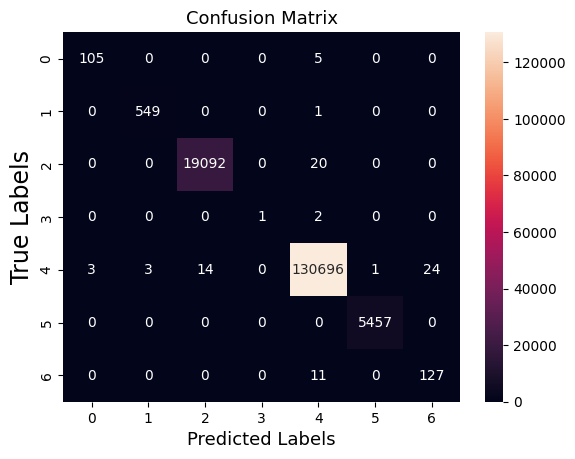

In [ ]:
sns.heatmap(cm, annot=True, fmt='g',)

plt.title("Confusion Matrix",fontsize=13)
plt.xlabel("Predicted Labels",fontsize=13)
plt.ylabel("True Labels",fontsize=17)

plt.show()

In [ ]:
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import r2_score,classification_report

DCT

In [ ]:
from sklearn.metrics import r2_score,classification_report
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DCT = DecisionTreeClassifier()

In [ ]:
DCT.fit(x_train_f, y_train_f)

DecisionTreeClassifier()

In [ ]:
y_pred = DCT.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, y_pred, digits=5))

              precision    recall  f1-score   support

         0.0    0.92453   0.89091   0.90741       110
         1.0    0.99818   0.99818   0.99818       550
         2.0    0.99885   0.99916   0.99901     19112
         3.0    1.00000   1.00000   1.00000         3
         4.0    0.99962   0.99954   0.99958    130741
         5.0    0.99982   0.99982   0.99982      5457
         6.0    0.80137   0.84783   0.82394       138

    accuracy                        0.99929    156111
   macro avg    0.96034   0.96221   0.96113    156111
weighted avg    0.99930   0.99929   0.99929    156111



In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, y_pred)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00071


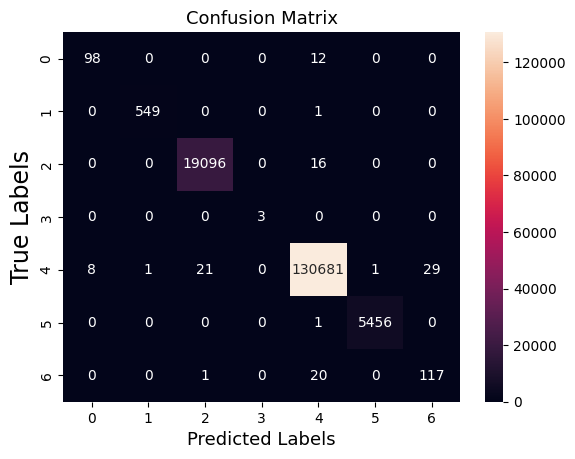

In [ ]:
sns.heatmap(cm, annot=True, fmt='g',)

plt.title("Confusion Matrix",fontsize=13)
plt.xlabel("Predicted Labels",fontsize=13)
plt.ylabel("True Labels",fontsize=17)

plt.show()

Stacking model-1

In [ ]:
from sklearn import model_selection
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import r2_score,classification_report

In [ ]:
seed = 8
num_trees = 500
RF = RandomForestClassifier(
    n_estimators=125,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

NB = BernoulliNB()

KNN_Classifier = KNeighborsClassifier()

base_cls = DecisionTreeClassifier()

base_estimators = []

base_estimators.append(("m1",RF))
base_estimators.append(("m2",NB))
base_estimators.append(("m3",KNN_Classifier))
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
aggregator1 = BaggingClassifier(estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
model1 = StackingClassifier(cv=cv, estimators=base_estimators + [('bagging', aggregator1)])
model1.fit(x_train_f, y_train_f)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('m1', RandomForestClassifier(n_estimators=125)),
                               ('m2', BernoulliNB()),
                               ('m3', KNeighborsClassifier()),
                               ('bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                  n_estimators=500,
                                                  random_state=8))])

In [ ]:
y_pred = model1.predict(x_test_f)

In [ ]:
print(classification_report(y_test_f, y_pred, digits=5))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0    0.99065   0.96364   0.97696       110
         1.0    1.00000   0.99818   0.99909       550
         2.0    0.99948   0.99937   0.99942     19112
         3.0    0.00000   0.00000   0.00000         3
         4.0    0.99972   0.99973   0.99973    130741
         5.0    1.00000   0.99963   0.99982      5457
         6.0    0.83784   0.89855   0.86713       138

    accuracy                        0.99955    156111
   macro avg    0.83253   0.83702   0.83459    156111
weighted avg    0.99954   0.99955   0.99954    156111



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, y_pred)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.5f}".format(false_alarm_rate))


False alarm rate: 0.00045


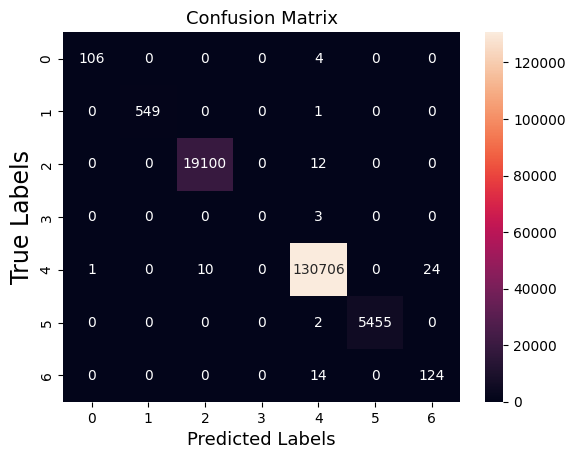

In [ ]:
sns.heatmap(cm, annot=True, fmt='g',)

plt.title("Confusion Matrix",fontsize=13)
plt.xlabel("Predicted Labels",fontsize=13)
plt.ylabel("True Labels",fontsize=17)
plt.show()